### Data cleaning checklist
   - [Save original data](#Saving-original-data)
   - [Identifying missing data](#Identifying-missing-data)
   - [Identifying placeholder data](#Identifying-placeholder-data)
   - [Identifying outliers](#Identifying-outliers)
   - [Check for overall plausibility and errors](#Check-for-overall-plausibility-and-errors)

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./data/kc_house_data.csv')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data cleaning checklist

### Saving original data

In [4]:
import os
directory = './data/original'

# creating directory if doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)
    
# writing data into the file
df.to_csv('./data/original/kc_house_data.csv')

### Identifying missing data

In [3]:
df.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.get_dtype_counts()

float64     5
int64      15
object      1
dtype: int64

In [49]:
# for column in df.isna():
#     select = df.isna()[column]
#     print("missing values in column ",column, len(df[column][select]))
# select  = df.apply(lambda r : any([e for e in r  ]),axis=1)
# for column in select:
# print(len(select))
# print(df_copy[select])
# df_with_no_strings = df[~rows_with_strings]
cols_with_missing = [col for col in df.columns 
                                 if df[col].isnull().any() or df[col].isna().any()]
print("missing value columns")
print(cols_with_missing)

missing value columns
[]


#### Well that means our dataset does not have any missing values

### Identifying placeholder data

In [42]:
df.head()
# Doing. Isn't done yet.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Identifying outliers

In [86]:
from collections import Counter, defaultdict
def checkOutlier(df, m = 4):
    uniOutlier = dict().fromkeys(df.columns, None)
    outSample = abs(df - df.mean()) > 4 * df.std()
    outSum = (abs(df - df.mean()) > 4 * df.std()).sum()
    for key in uniOutlier.keys():
        uniOutlier[key] = set(outSample.index[outSample.loc[:, key]])
    outportion = outSum / df.shape[0]
    #print("No outlier Vars: " ,outSum.index[outportion == 0].tolist())
    #print("Outlier Portion")
    #print(outportion[outportion != 0].index.tolist())
    #print(outportion[outportion != 0].values.tolist())
    outportion = outportion[outportion != 0].sort_values()
    outlierLst = outportion.index.tolist()
    return uniOutlier, outlierLst

from collections import Counter
def outlierCounter(outlierDict, exceptionLst = ['price']):
    inter = Counter()
    name = defaultdict(list)
    coreKey = set(outlierDict.keys()).difference(exceptionLst)
    for key in coreKey:
        value = outlierDict[key]
        for val in value:
            inter[val] += 1
            name[val].append(key)
    res = pd.DataFrame([inter, name], index = ['count', 'variable']).T
    res = res.sort_values('count', ascending = False)
    return res

from scipy.stats import multivariate_normal
def bivarCI(dfNum, y = 'price', outer = 10, z_score = 0.00006, cols = 2):
    
    colNum = dfNum.shape[1]
    row, col = divmod(colNum-1, cols)
    if row == 1 and col == 0: row += 1
    if col != 0: row += 1
    
    
    z_under = z_score * 0.98
    z_upper = z_score * 1.02
    
    biOutlier = dict().fromkeys(dfNum.columns, None)
    #f, axes = plt.subplots(row, cols, figsize = (4*cols, 4*row))
    #f.suptitle('Bivaraite CI', fontsize = 12)
    for ix, var1 in enumerate(dfNum.columns):
        if var1 == y: break
        r,c = divmod(ix, cols)
        dfPart = dfNum.loc[:, [var1,y]]
        dfPart = dfPart[~dfPart.isnull()].copy()
        dfPart = dfPart.loc[dfPart.loc[:, var1] != 0,:]
        dfPart = (dfPart - dfPart.mean()) / dfPart.std()
        F, X, Y, posProb = bivarConverter(dfPart, outer, z_under, z_upper, N = 700)
        #axes[r,c].contourf(X, Y, posProb)
        #axes[r,c].scatter(dfPart.loc[:, var1], dfPart.loc[:, y], alpha = 1)
        #axes[r,c].set_title('Bivaraite CI ' + var1)
        dfPartProb = F.pdf(dfPart.values)
        outIndex = dfPart.index[dfPartProb < z_score]
        biOutlier[var1] = set(outIndex.tolist())
    #f.tight_layout(rect = [0, 0.03, 1, 0.95])
    #plt.show()
    
    return biOutlier

def bivarConverter(df, outer, z_under, z_upper, N = 500):
    x_init, y_init = df.min() - outer
    x_end, y_end = df.max() + outer
    X = np.linspace(x_init, x_end, N)
    Y = np.linspace(y_init, y_end, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.empty(X.shape + (2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    F = multivariate_normal(mean=df.mean().values, cov=df.corr().values)
    posProb = F.pdf(pos)
    posProb[(z_under < posProb) & (posProb < z_upper)] = 1
    posProb[(z_under > posProb) | (posProb < z_upper)] = 0
       
    return F , X, Y, posProb

In [87]:
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return upper_bound, np.where((ys > upper_bound) | (ys < lower_bound))

In [88]:
def detect_outliers(cols):
    uniOutlier, outlierList = checkOutlier(df.loc[:, cols])
    uniOut = outlierCounter(uniOutlier, ['price'])
    biOutlier = bivarCI(df.loc[:, cols], outer = 2, z_score = 0.00006,  cols = 4)
    biOut = outlierCounter(biOutlier, ['price'])
    totOut = uniOut.join(biOut, lsuffix='_uni', rsuffix='_bi')
    
    for outlier_type in cols:
        import math
        # for i, row in totOut.iterrows():
        #     if not isinstance(row['variable_bi'], float)  and 'sqft_living' in row['variable_bi']:
        #         print(df['sqft_living15'][i])
        # print("#####################################")
        indices = [x[0] for x in totOut.iterrows() if not isinstance(x[1]['variable_uni'], float) and outlier_type in x[1]['variable_uni']]
        rows = [x[1] for x in totOut.iterrows()]
        outliers = [x[1][outlier_type] for x in df.iterrows() if x[0] in indices]
        print("")
        print("-",outlier_type)
        print("")
        print("Histogram of ",outlier_type, " whole data")
        plt.hist(df[outlier_type])
        plt.show()
        print("    Number of univariate outliers for ",outlier_type," ",len(outliers), " out of total ",len(df['price']))
        print("")
        print("Histogram of ",outlier_type, " outlier data. Detected with univariate outlier detection method")
        plt.hist(outliers)
        plt.show()
        if len(outliers) > 0:
            print("    As shown in the histogram, all the data points of ",outlier_type, " above ",min(outliers)," is identified as outliers in univariate method")
        iqr_upper, iqr_outliers = outliers_iqr(df[outlier_type])
        print()
        print("    Number of IQR outliers for ",outlier_type," ",len(iqr_outliers[0]), " out of total ",len(df['price']))
        print("")
        print("Boxplot of outlier detected with boxplot i.e. IQR method in ",outlier_type)
        sns.boxplot(y=outlier_type, data=df, fliersize=10)
        plt.show()
        print("    As shown in the histogram, all the data points of ",outlier_type, " above ",iqr_upper," is identified as outliers with IQR method")
        print("")
        print("")
        print("")

In [89]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


- sqft_living

Histogram of  sqft_living  whole data


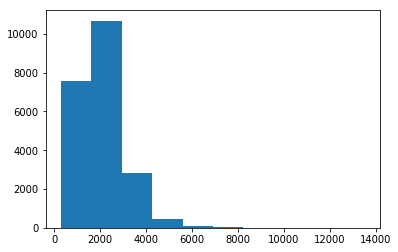

    Number of univariate outliers for  sqft_living   94  out of total  21613

Histogram of  sqft_living  outlier data. Detected with univariate outlier detection method


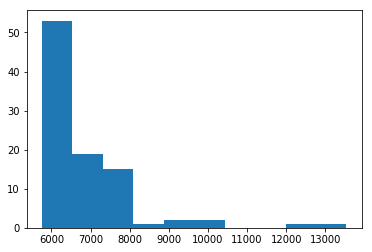

    As shown in the histogram, all the data points of  sqft_living  above  5760  is identified as outliers in univariate method

    Number of IQR outliers for  sqft_living   572  out of total  21613

Boxplot of outlier detected with boxplot i.e. IQR method in  sqft_living


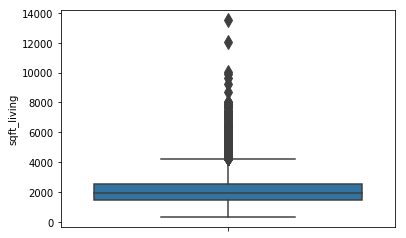

    As shown in the histogram, all the data points of  sqft_living  above  4234.5  is identified as outliers with IQR method




- sqft_lot

Histogram of  sqft_lot  whole data


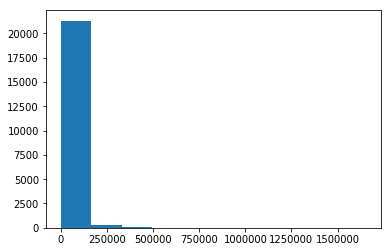

    Number of univariate outliers for  sqft_lot   292  out of total  21613

Histogram of  sqft_lot  outlier data. Detected with univariate outlier detection method


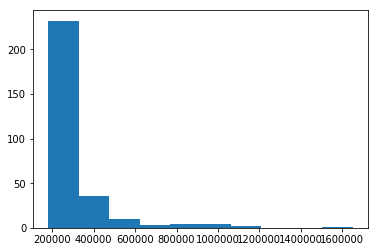

    As shown in the histogram, all the data points of  sqft_lot  above  181319  is identified as outliers in univariate method

    Number of IQR outliers for  sqft_lot   2425  out of total  21613

Boxplot of outlier detected with boxplot i.e. IQR method in  sqft_lot


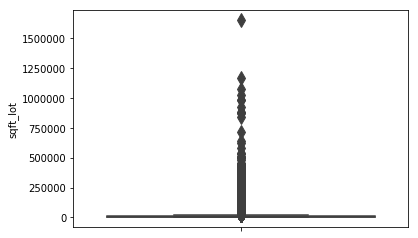

    As shown in the histogram, all the data points of  sqft_lot  above  19160.0  is identified as outliers with IQR method




- sqft_basement

Histogram of  sqft_basement  whole data


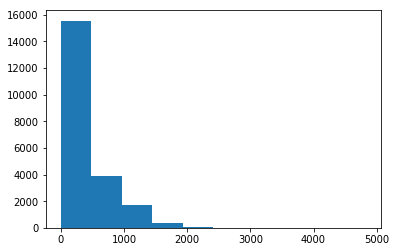

    Number of univariate outliers for  sqft_basement   60  out of total  21613

Histogram of  sqft_basement  outlier data. Detected with univariate outlier detection method


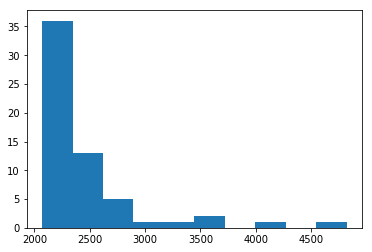

    As shown in the histogram, all the data points of  sqft_basement  above  2070  is identified as outliers in univariate method

    Number of IQR outliers for  sqft_basement   496  out of total  21613

Boxplot of outlier detected with boxplot i.e. IQR method in  sqft_basement


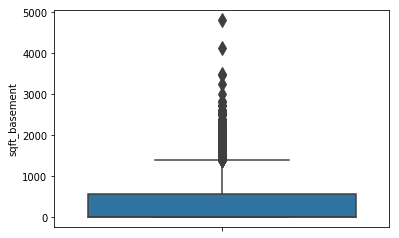

    As shown in the histogram, all the data points of  sqft_basement  above  1400.0  is identified as outliers with IQR method




- price

Histogram of  price  whole data


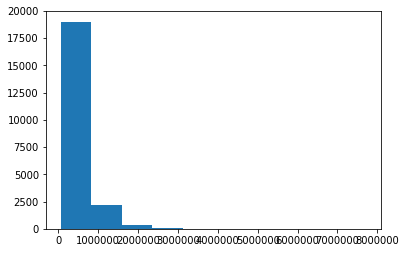

    Number of univariate outliers for  price   0  out of total  21613

Histogram of  price  outlier data. Detected with univariate outlier detection method


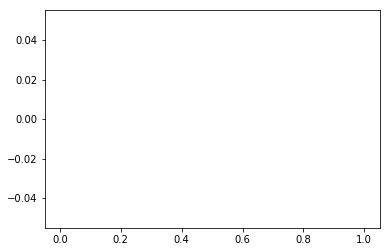


    Number of IQR outliers for  price   1146  out of total  21613

Boxplot of outlier detected with boxplot i.e. IQR method in  price


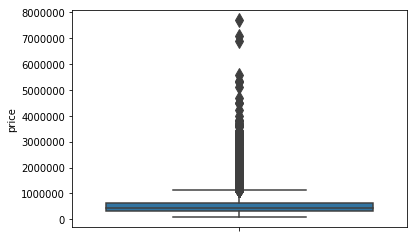

    As shown in the histogram, all the data points of  price  above  1129575.0  is identified as outliers with IQR method





In [90]:
cols = ['sqft_living','sqft_lot', 'sqft_basement', 'price']
detect_outliers(cols)

### Check for overall plausibility and errors

In [6]:
# Checking date values
print(df['date'].head())
type(df['date'][0])

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object


str

As clear as it can be, we can easily convert the given datetime format into python's date time format. As demonstrated below. So there is no problem with this column.

In [21]:
from datetime import datetime

datetime_object = datetime.strptime('20141013T000000', '%Y%m%dT000000')
datetime_object

datetime.datetime(2014, 10, 13, 0, 0)

In [24]:
# Checking price values has any negative or 0 value
print("0 or negative values for price")
print(sum(df['price']<=0))

0 or negative values for price
0


In [22]:
# Checking bedrooms values
print("Bedrooms unique values")
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [25]:
# Checking bathrooms values
print("Bathrooms unique values")
df['bathrooms'].unique()

Bathrooms unique values


array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [92]:
# Checking sq. feet living values has any negative or 0 value
print("0 or negative values for Sq feet living")
print(sum(df['sqft_living']<=0))

0 or negative values for Sq feet
0


In [93]:
# Checking sq. feet lot values has any negative or 0 value
print("0 or negative values for Sq feet Lot")
print(sum(df['sqft_lot']<=0))

0 or negative values for Sq feet Lot
0


In [95]:
# Checking sq. feet values has any negative or 0 value
print("0 or negative values for floor")
print(sum(df['floors']<=0))

0 or negative values for floor
0


In [96]:
# Checking values of waterfront, should be either 0 or 1
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [100]:
# Checking values of view. should contain only positive numbers
print(df['view'].unique())
print("negative values for view")
print(sum(df['floors']<0))

[0 3 4 2 1]
negative values for view
0


In [99]:
# Checking overall condition of house. Will contain rating
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [101]:
# Checking grade values
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [104]:
# Checking sq feet above. Sq feet apart from basement
print("negative or 0 values for sq feet above")
print(sum(df['sqft_above']<=0))

negative values for sq feet above
0


In [107]:
# Checking sq feet above. Sq feet apart from basement
print("negative values for sq feet basement")
print(sum(df['sqft_basement']<0))

negative values for sq feet above
0


In [108]:
# checking year built
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [110]:
# checking year renovated
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

Year renovated holds the value 0. Which indicates that it is a placeholder value and the house is never been renovated.

In [111]:
# checking zipcode values
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [113]:
# checking lat values
print("0 values for lat")
print(sum(df['lat']==0))
df['lat'].unique()

0 values for sq feet basement
0


array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [116]:
# checking long values
print("0 values for long")
print(sum(df['long']==0))

0 values for long
0


In [118]:
# checking sq feet living15, Living room area in 2015(implies-- some renovations)
#This might or might not have affected the lotsize area
print("0 values for sqft living15")
print(sum(df['sqft_living15']<=0))

0 values for sqft living15
0


In [119]:
# checking sq feet living15, lotSize area in 2015(implies-- some renovations)
print("0 values for sqft lot 15")
print(sum(df['sqft_lot15']<=0))

0 values for sqft lot 15
0


In [28]:
# Checking view values
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

##### Observation:
There is no missing data in dataset. There are no inappropriate values observed in dataset. The dataset seems to be logical and valid.